In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('x_train shape : ' + str(x_train.shape))
print('y_train shape : ' + str(y_train.shape))
print('x_test shape : ' + str(x_test.shape))
print('y_test shape : ' + str(y_test.shape))

x_train shape : (60000, 28, 28)
y_train shape : (60000,)
x_test shape : (10000, 28, 28)
y_test shape : (10000,)


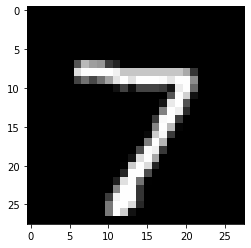

In [3]:
plt.imshow(x_test[0], cmap = 'gray')

In [4]:
print(y_test[0])

7


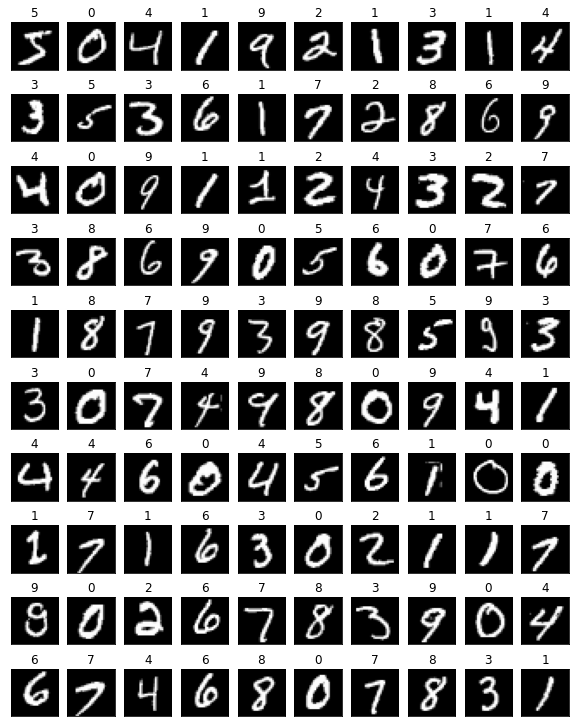

In [5]:
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(10, 13), 
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i], cmap = 'gray')
    ax.set_title(y_train[i])

plt.show()

모델 학습에 용이하도록 다음과 같이 데이터 전처리를 수행합니다.

*   데이터 전처리
    * 3차원(샘플수, 세로, 가로)를 2차원(샘플수, 벡터수)으로 변경
    * 정수를 실수로 변경
    * 0 ~ 255 사이의 수치를 0.0 ~ 1.0 사이로 정규화 수행
*   라벨 전처리
    * 0 ~ 9 라벨에 대한 원핫인코딩 수행 



In [6]:
x_train = x_train.reshape(60000, 784).astype('float32')/255.0
x_test = x_test.reshape(10000, 784).astype('float32')/255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
model = Sequential([
    Dense(64, input_dim=28*28, activation='relu'), 
    Dense(32, activation='relu'), 
    Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

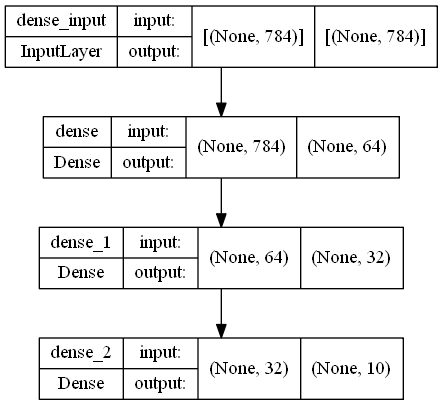

In [8]:
plot_model(model, show_shapes=True)

In [10]:
hist = model.fit(x_train, y_train,
                batch_size=32,
                epochs=100)

Epoch 1/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2867 - accuracy: 0.9157
Epoch 2/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1261 - accuracy: 0.9623
Epoch 3/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0920 - accuracy: 0.9713
Epoch 4/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0731 - accuracy: 0.9778
Epoch 5/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0604 - accuracy: 0.9808
Epoch 6/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0533 - accuracy: 0.9832
Epoch 7/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0439 - accuracy: 0.9861
Epoch 8/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0388 - accuracy: 0.9875
Epoch 9/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0333 - accuracy: 0.9891
Epoch 10/100
1875/1875 [==============================] - 2s 1ms/step - l

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0045 - accuracy: 0.9987
Epoch 80/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0046 - accuracy: 0.9987
Epoch 81/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0059 - accuracy: 0.9984
Epoch 82/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0044 - accuracy: 0.9987
Epoch 83/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0057 - accuracy: 0.9984
Epoch 84/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0050 - accuracy: 0.9984
Epoch 85/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0036 - accuracy: 0.9988
Epoch 86/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0068 - accuracy: 0.9980
Epoch 87/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0038 - accuracy: 0.9988
Epoch 88/100
1875/1875 [==============================] - 2s 1ms/step - loss:

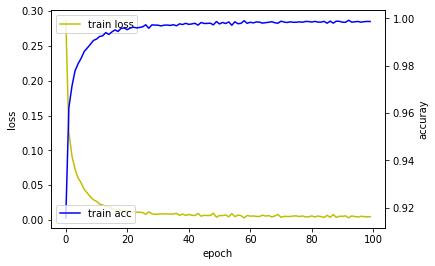

In [12]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label = 'train loss')
acc_ax.plot(hist.history['accuracy'], 'b', label = 'train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc = 'upper left')
acc_ax.legend(loc = 'lower left')

plt.show()

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

313/313 [==============================] - 0s 824us/step - loss: 0.2910 - accuracy: 0.9767
Test accuracy 0.9767000079154968
Test loss 0.2909696400165558


In [14]:
y_pred = model.predict(x_test)
y_pred = y_pred.argmax(axis=-1)
np.savetxt('y_pred.csv', y_pred, fmt ='%d')